# Validating analytical predictions

In this section we show an example of validating some simple analytical predictions from coalescent theory using simulations. The number of segregating sites is the total number of mutations that occured in the history of the sample (assuming the infinite sites mutation model). Since mutations happen as a Poisson process along the branches of the tree, what we are really interested in is the distribution of the total branch length of the tree. The results in this section are well known classical results from coalescent theory; this section is intended as a demonstration of how one goes about comparing analytical results to simulations.


In [3]:
%matplotlib inline
import msprime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import binom


The first properties that we are interested in are the mean and the variance of the total branch length of coalescent trees. 

In [4]:
def T_total_mean(n):
    return 2 * np.sum(1 / np.arange(1, n))

def T_total_var(n):
    return 4 * np.sum(1 / np.arange(1, n)**2)

ns = np.array([5, 10, 15, 20, 25])
num_replicates = 1000
n_col = np.zeros(ns.shape[0] * num_replicates)
T_total_col = np.zeros(ns.shape[0] * num_replicates)
row = 0
for n in ns:
    for ts in msprime.simulate(n, Ne=0.5, num_replicates=num_replicates):
        tree = next(ts.trees())
        n_col[row] = n
        T_total_col[row] = tree.total_branch_length
        row += 1
df = pd.DataFrame({"n": n_col, "T_total": T_total_col})


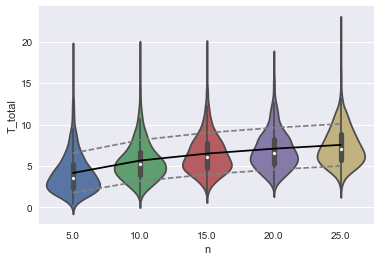

In [5]:
mean_T = np.array([T_total_mean(n) for n in ns])
var_T = np.sqrt(np.array([T_total_var(n) for n in ns]))

ax = sns.violinplot(x="n", y="T_total", data=df)
ax.plot(mean_T, "-", color="black");
ax.plot(mean_T - var_T, "--", color="grey");
ax.plot(mean_T + var_T, "--", color="grey");


In [6]:
def S_dist(n, theta, k):
    S = 0
    for i in range(2, n + 1):
        S += ((-1)**i * binom(n - 1, i - 1) 
              * (i - 1) / (theta + i - 1) * (theta / (theta + i - 1))**k)
    return S

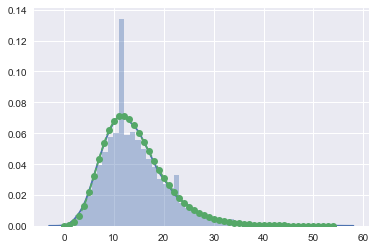

In [9]:
n = 20
theta = 4
num_replicates = 10000

observed = np.zeros(num_replicates)
replicates = msprime.simulate(
    n, Ne=0.5, mutation_rate=theta / 2, num_replicates=num_replicates)
for j, ts in enumerate(replicates):
    observed[j] = ts.num_sites
ks = np.arange(np.max(observed))
analytical = np.array([S_dist(n, theta, k) for k in ks])

sns.distplot(observed) #, kde=False, hist=True, norm_hist=True)
plt.plot(ks, analytical, "--", marker='o');
